# SF Salaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mso
%matplotlib inline

## Data Cleaning: 
0. Change data type of BasePay,OvertimePay, OtherPay and Benefits to numeric.
0. Fill missing values with 0.
0. Delete columns that don't need.
0. Normalize JobTitle and EmployeeName to upper case.
0. Delete rows that JobTitle are 'Not Provided'.
0. Manually update top 20 paid titles from 2011 and 2014, since the names were either a subset or a partial match     across years.
0. Replace job titles' roman numerals with arabic numerals.

In [2]:
df=pd.read_csv('Salaries.csv',index_col=0,low_memory=False)

In [3]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148654 entries, 1 to 148654
Data columns (total 12 columns):
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148049 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            112495 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 14.7+ MB


** As we could see from the above, BasePay, OvertimePay,OtherPay and Benefits are object. However, they should be Numeric. Let's change the data type. **

In [5]:
## Change data type to numeric. If ‘coerce’, then invalid parsing will be set as NaN
for name in ['BasePay','OvertimePay','OtherPay','Benefits']:
    df[name]=pd.to_numeric(df[name],errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148654 entries, 1 to 148654
Data columns (total 12 columns):
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(7), int64(1), object(4)
memory usage: 14.7+ MB


** Missing Values. From df.info() we could tell which columns have missing values, but here I used Missingno to visualize those columns.**

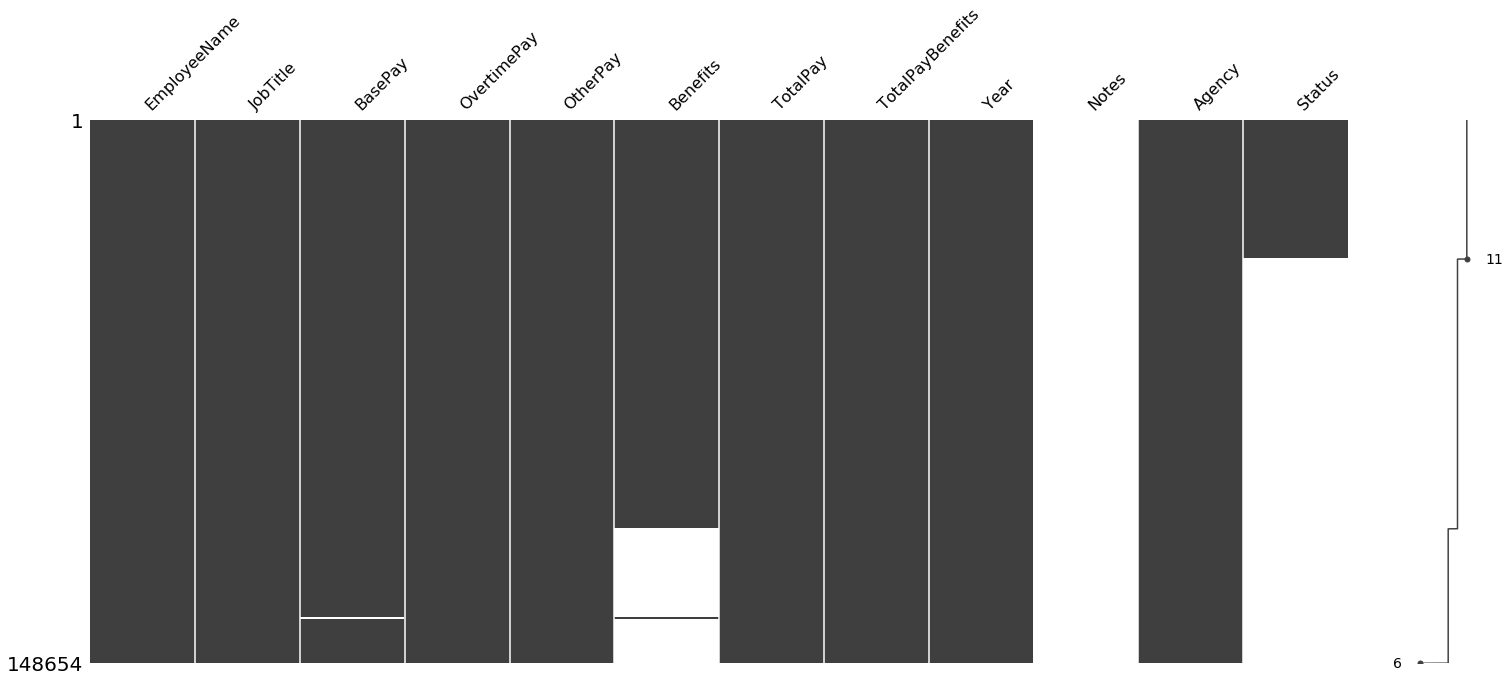

In [7]:
missing=mso.nullity_sort(df,sort='descending')
mso.matrix(missing)

In [8]:
df['Notes'].unique()

array([ nan])

In [9]:
df['Agency'].unique()

array(['San Francisco'], dtype=object)

In [10]:
df['Status'].unique()

array([nan, 'PT', 'FT'], dtype=object)

** As we can see that Notes and Agancy columns only have one unique value, so I decide to delete those columns that we would'n use in later's analysis.**

In [11]:
df.drop(['Notes','Agency'],axis=1,inplace=True)

In [12]:
##Fill missing value NaN to 0
df[['BasePay','Benefits']]=df[['BasePay','Benefits']].fillna(0)

** Normalizing EmployeeName and JobTitle values to upper case.**

In [13]:
df['EmployeeName'].value_counts().head()  ## Upper and lower case problem, such as Kevin Lee and KEVIN LEE

Kevin Lee       13
Richard Lee     11
William Wong    11
Steven Lee      11
John Chan        9
Name: EmployeeName, dtype: int64

In [14]:
df['JobTitle'].value_counts()  ## Upper and lower case problem. 

Transit Operator                                      7036
Special Nurse                                         4389
Registered Nurse                                      3736
Public Svc Aide-Public Works                          2518
Police Officer 3                                      2421
Custodian                                             2418
TRANSIT OPERATOR                                      2388
Firefighter                                           2359
Recreation Leader                                     1971
Patient Care Assistant                                1945
Deputy Sheriff                                        1933
Police Officer                                        1476
SPECIAL NURSE                                         1402
Public Service Trainee                                1328
REGISTERED NURSE                                      1219
Police Officer 2                                      1141
Attorney (Civil/Criminal)                             11

In [15]:
# Change all values to upper case.
df['EmployeeName']=df['EmployeeName'].str.upper().str.replace('  ',' ')
df['JobTitle']=df['JobTitle'].str.upper().str.replace('  ',' ')

** Deleting rows that JobTitle and EmployeeName have 'Not Provided'.**

In [16]:
df[df['EmployeeName'].str.contains('NOT PROVIDED')]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
Id,,,,,,,,,,
13798,NOT PROVIDED,PUBLIC SAFETY COMMUNICATIONS DISPATCHER,57963.39,19683.91,4373.86,0.0,82021.16,82021.16,2011,NaN
44152,NOT PROVIDED,PUBLIC SAFETYCOMM DISP,82196.52,25934.20,3752.49,38024.3,111883.21,149907.51,2012,NaN
148647,NOT PROVIDED,NOT PROVIDED,0.00,NaN,NaN,0.0,0.00,0.00,2014,NaN
148651,NOT PROVIDED,NOT PROVIDED,0.00,NaN,NaN,0.0,0.00,0.00,2014,NaN
148652,NOT PROVIDED,NOT PROVIDED,0.00,NaN,NaN,0.0,0.00,0.00,2014,NaN
148653,NOT PROVIDED,NOT PROVIDED,0.00,NaN,NaN,0.0,0.00,0.00,2014,NaN


In [17]:
df=df[df['JobTitle'] !='NOT PROVIDED']

In [18]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000
mean,66055.506718,5066.059886,3648.767297,18924.742068,74770.333901,93695.075969,2012.522603
std,42885.919334,11454.380559,8056.601866,17165.229731,50516.196009,62792.497391,1.117526
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,32798.550000,0.000000,0.000000,0.000000,36169.955000,44073.337500,2012.000000
50%,64862.310000,0.000000,811.270000,23217.135000,71427.240000,92406.020000,2013.000000
75%,94609.715000,4658.175000,4236.065000,33468.980000,105842.960000,132877.992500,2014.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


** People have negative pay? Here I decide to only use data that TotalPayBenefits are non-negative.**

In [19]:
## Fliter TotalPayBenefits are non-negative.
df=df[df['TotalPayBenefits']>0]

### Job tiles problem:


In [20]:
## Group TotalPay of Year and JobTitle by calulating it's mean values.
df2=df.groupby(['Year','JobTitle'])['TotalPay'].median().unstack('Year').fillna(0)

In [21]:
##Top 20 jobs in year 2011
df2[2011].sort_values(ascending=False).head(20)

JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY        399211.275
DEPUTY DIRECTOR OF INVESTMENTS                        307899.460
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)                302377.730
EXECUTIVE CONTRACT EMPLOYEE                           277438.840
ASSISTANT MEDICAL EXAMINER                            273771.210
CHIEF OF POLICE                                       267992.590
DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)          261366.140
ADMINISTRATOR, SFGH MEDICAL CENTER                    257124.440
DEPARTMENT HEAD V                                     248895.770
DEPUTY CHIEF III (POLICE DEPARTMENT)                  248718.640
ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)      237344.410
PORT DIRECTOR                                         233357.280
BATTALION CHIEF, (FIRE DEPARTMENT)                    221049.320
FORENSIC TOXICOLOGIST                                 215318.200
CONFIDENTIAL CHIEF ATTORNEY II (CIVIL & CRIMINAL)     214988.680
COMMANDER III, (

In [22]:
## Top 20 jobs in year 2014
df2[2014].sort_values(ascending=False).head(20)

JobTitle
CHIEF INVESTMENT OFFICER          339653.700
CHIEF OF POLICE                   326716.760
CHIEF, FIRE DEPARTMENT            326233.440
ASST MED EXAMINER                 314441.280
GEN MGR, PUBLIC TRNSP DEPT        294000.180
DEP CHF OF DEPT (FIRE DEPT)       285575.785
ASST CHF OF DEPT (FIRE DEPT)      282782.735
ADMINISTRATOR, DPH                282619.960
MAYOR                             281537.170
EXECUTIVE CONTRACT EMPLOYEE       278544.710
ADM, SFGH MEDICAL CENTER          268946.020
DEPUTY CHIEF 3                    268864.585
DEPT HEAD V                       267914.010
CONTROLLER                        267914.000
PORT DIRECTOR                     252149.010
ASSISTANT DEPUTY CHIEF 2          249505.880
DISTRICT ATTORNEY                 248767.060
MANAGER, DEPT PUBLIC HEALTH       248637.570
BATTALION CHIEF, FIRE SUPPRESS    248616.040
EMERGENCY MEDICAL SVCS CHIEF      244209.180
Name: 2014, dtype: float64


___
** Have you noticed the difference of some jobtitles? For example. CHIEF OF DEPARTMENT, (FIRE DEPARTMENT) and CHIEF, FIRE DEPARTMENT. But they shoud have the same job title: Chief of fire department. **

**Let's explore more about Accountant. **

In [23]:
df[df['JobTitle']=='ACCOUNTANT']

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
Id,,,,,,,,,,
19264,CARLITO NEPACENA,ACCOUNTANT,65392.01,0.0,0.00,0.0,65392.01,65392.01,2011,NaN
19325,ROSALINDA TAN,ACCOUNTANT,65225.31,0.0,0.00,0.0,65225.31,65225.31,2011,NaN
20993,NELSON ALVARADO,ACCOUNTANT,60076.24,0.0,0.00,0.0,60076.24,60076.24,2011,NaN
25928,JEANETTE COOPER,ACCOUNTANT,42522.30,0.0,2782.08,0.0,45304.38,45304.38,2011,NaN
35286,CESAR PALARCA,ACCOUNTANT,0.00,0.0,1148.40,0.0,1148.40,1148.40,2011,NaN


In [24]:
df[(df['JobTitle']=='ACCOUNTANT I') & (df['Year'].isin([2012,2013,2014]))]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
Id,,,,,,,,,,
55292,NELSON ALVARADO,ACCOUNTANT I,67895.66,0.0,0.00,31049.72,67895.66,98945.38,2012,NaN
55574,CARLITO NEPACENA,ACCOUNTANT I,66911.00,0.0,0.00,30851.50,66911.00,97762.50,2012,NaN
56189,ROSALINDA TAN,ACCOUNTANT I,65091.49,0.0,0.00,30090.33,65091.49,95181.82,2012,NaN
92397,CARLITO A NEPACENA,ACCOUNTANT I,71605.00,0.0,0.00,27901.82,71605.00,99506.82,2013,NaN
92600,ROSALINDA B TAN,ACCOUNTANT I,70969.22,0.0,0.00,27650.82,70969.22,98620.04,2013,NaN
95727,NELSON ALVARADO,ACCOUNTANT I,60941.02,0.0,2066.15,23597.12,63007.17,86604.29,2013,NaN
129822,CARLITO A NEPACENA,ACCOUNTANT I,70890.04,0.0,0.00,29355.86,70890.04,100245.90,2014,FT
140731,ROSALINDA B TAN,ACCOUNTANT I,19919.23,0.0,0.00,8191.53,19919.23,28110.76,2014,PT


____
** Have you noticed the difference between ACCOUNTANT (2011) and ACCOUNTAN I (2012-2014). They should have the same job title.**

** Here I manually update top 20 paid titles from 2011 and 2014, since the names were either a subset or a partial match across years.**

In [25]:
#Update top 20 names
df['JobTitle']=df['JobTitle'].replace({'CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)' : 'CHIEF, FIRE DEPARTMENT',
                'ASSISTANT MEDICAL EXAMINER' : 'ASST MED EXAMINER',
                'DEPUTY CHIEF III (POLICE DEPARTMENT)' : 'DEPUTY CHIEF 3',
                'DEPARTMENT HEAD V' : 'DEPT HEAD V',
                'DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)' : 'ASSISTANT DEPUTY CHIEF 2',
                'DEPUTY DIRECTOR I - MUNICIPAL TRANSPORTATION AGE' : 'DEPUTY DIR I, MTA',
                'DEPUTY DIRECTOR V' : 'DEP DIR V',
                'LIEUTENANT, BUREAU OF FIRE PREVENTION AND PUBLIC S' : 'LIEUT,FIRE PREV',
                'CONFIDENTIAL CHIEF ATTORNEY II (CIVIL & CRIMINAL)' : 'CFDNTAL CHF ATTY 2,(CVL&CRMNL)',
                'CAPTAIN III (POLICE DEPARTMENT)' : 'CAPTAIN 3',
                'DEPUTY DIRECTOR II - MUNICIPAL TRANSPORTATION AG' : 'DEPUTY DIR II, MTA',
                'BATTALION CHIEF, (FIRE DEPARTMENT)' : 'BATTALION CHIEF, FIRE SUPPRESS',
                'DEPARTMENT HEAD IV' : 'DEPT HEAD IV',
                'COMMANDER III, (POLICE DEPARTMENT)' : 'CAPTAIN 3',
                'ADMINISTRATOR, SFGH MEDICAL CENTER' : 'ADM, SFGH MEDICAL CENTER',
                'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY' : 'GEN MGR, PUBLIC TRNSP DEPT',
                'ASSISTANT DEPUTY CHIEF II' : 'ASSISTANT DEPUTY CHIEF 2',
                'DEPUTY DIRECTOR OF INVESTMENTS' : 'DEP DIR FOR INVESTMENTS, RET',
                'BATTLION CHIEF, FIRE SUPPRESSI' : 'BATTALION CHIEF, FIRE SUPPRESS',
                'BATTLION CHIEF, FIRE SUPPRESS' : 'BATTALION CHIEF, FIRE SUPPRESS',
                'ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)' : 'ASST CHF OF DEPT (FIRE DEPT)',
                'POLICE OFFICER I':'POLICE OFFICER 1',
                'ACCOUNTANT':'ACCOUNTANT I'})

** Have you also noticed that some titles followed with roman numerals, but some of them with arabic numerala?
Here I replace all the roman with arabic. **

In [26]:
#Replace roman numerals with arabic numerals
num1 = {r' I ': r' 1 ',
        r' II ': r' 2 ',
        r' III': r' 3',
        r' IV': r' 4',
        r' V ': r' 5 ',
        r' VI ': r' 6 ',
        r' VII ': r' 7 ',
        r' VIII ': r' 8 ',
        r' I, ': r' 1, ',
        r' II, ': r' 2, ',
        r' III, ': r' 3, ',
        r' IV, ': r' 4, ',
        r' V, ': r' 5, ',
        r' VI, ': r' 6, ',
        r' VII, ': r' 7, ',
        r' VIII, ': r' 8, ',
        r' XIV': r' 14',
        r' XXII': r' 22'}
num2 = {r' I$': r' 1',
        r' II$': r' 2',
        r' III$': r' 3',
        r' IV$': r' 4',
        r' V$': r' 5',
        r' VI$': r' 6',
        r' VII$': r' 7',
        r' VIII$': r' 8',
        r' IX$': r' 9',
        r' X$': r' 10',
        r' XI$': r' 11',
        r' XII$': r' 12',
        r' XIII$': r' 13',
        r' XIV$': r' 14',
        r' XV$': r' 15',
        r' XVI$': r' 16',
        r' XVII$': r' 17',
        r' XVIII$': r' 18'}

In [27]:
df['JobTitle']=df['JobTitle'].replace(num1,regex=True,inplace=False)
df['JobTitle'].replace(num2,regex=True,inplace=True)

In [42]:
df3=df.groupby(['Year','JobTitle'])['TotalPay'].median().unstack('Year').fillna(0)

____

## EDA

** Using Botplot to check out the distribution of TotalPay of each year.**

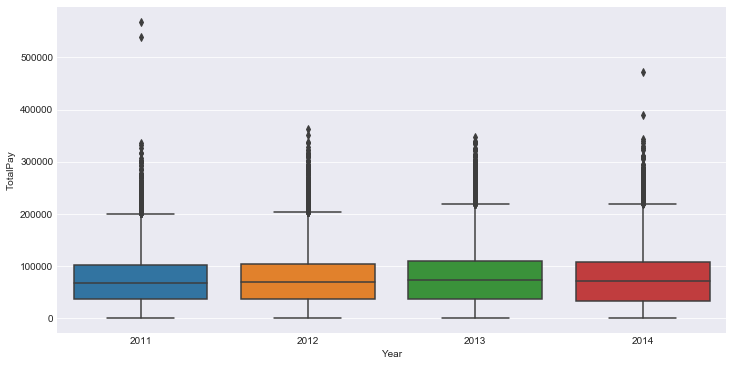

In [30]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.boxplot('Year','TotalPay',data=df)

** As we could see in the above chart, indicated lot of outliers of each year. Then I use median on following analysis. Beacuse mean is very sensitive to the most abnormal of values such as outliers.**
____

**Showing median value of BasePay,TotalPay and TotalBenefitsPay of each year.**

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

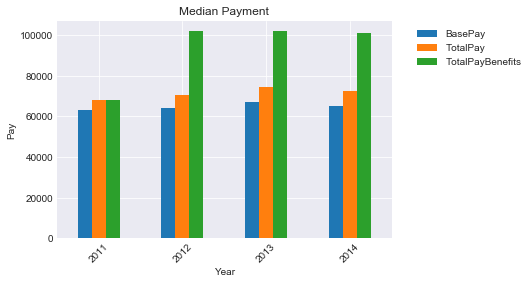

In [31]:
df.groupby('Year')['BasePay','TotalPay','TotalPayBenefits'].median().plot(kind='bar')
plt.ylabel('Pay')
plt.title('Median Payment')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

____
**Top 10 jobs in 2011 and 2014**

In [32]:
top10=df.groupby(['Year','JobTitle'])['TotalPay'].median().unstack('Year').fillna(0)

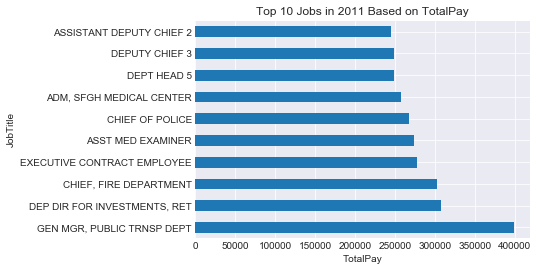

In [33]:
top10[2011].sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Jobs in 2011 Based on TotalPay')
plt.xlabel('TotalPay')

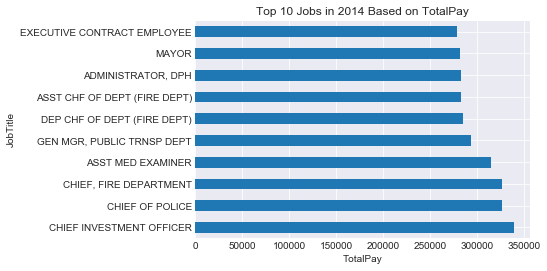

In [34]:
top10[2014].sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Jobs in 2014 Based on TotalPay')
plt.xlabel('TotalPay')

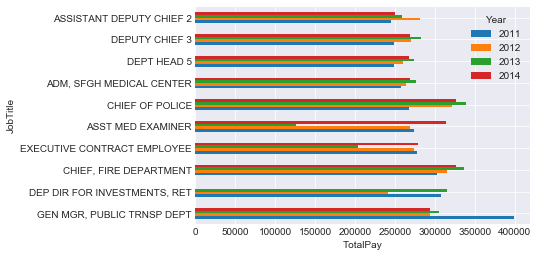

In [35]:
top10.sort_values(by=[(2011)],ascending=False).head(10).plot(kind='barh')
plt.xlabel('TotalPay')

____
** Because I am very interested in how much Registered Nurse and FireFighter make. So Let's check out.**

In [36]:
NurseFire=df[df['JobTitle'].isin(['REGISTERED NURSE','FIREFIGHTER'])]

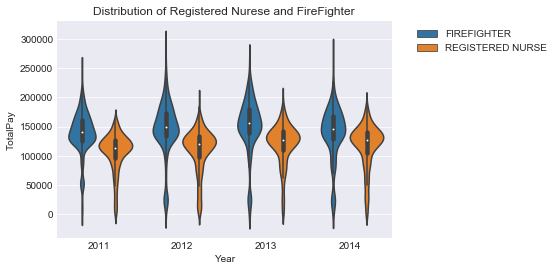

In [37]:
##Distribution of TotalPay of Registered Nurese and FireFighter over years
sns.violinplot('Year','TotalPay',data=NurseFire,hue='JobTitle')
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Distribution of Registered Nurese and FireFighter')

____

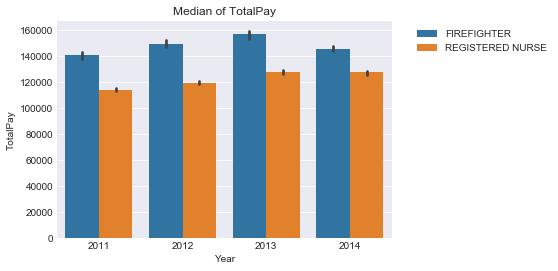

In [62]:
##Median Totalpay
sns.barplot('Year','TotalPay',data=NurseFire,hue='JobTitle',estimator=np.median)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Median of TotalPay')

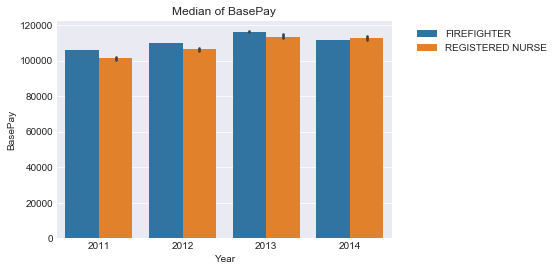

In [63]:
##Median BasePay of each years
sns.barplot('Year','BasePay',data=NurseFire,hue='JobTitle',estimator=np.median)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Median of BasePay')

In [38]:
fire=NurseFire[NurseFire['JobTitle']=='FIREFIGHTER']
nurse=NurseFire[NurseFire['JobTitle']=='REGISTERED NURSE']

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

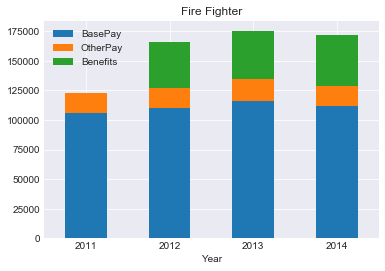

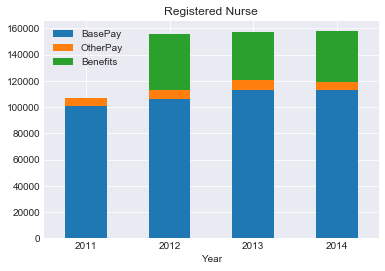

In [39]:
fire.groupby('Year')[['BasePay','OtherPay','Benefits']].median().plot(kind='bar',stacked=True)
plt.title('Fire Fighter')
plt.xticks(rotation=360)

nurse.groupby('Year')[['BasePay','OtherPay','Benefits']].median().plot(kind='bar',stacked=True)
plt.title('Registered Nurse')
plt.xticks(rotation=360)

** As we could see in the above, FireFighter's median TotalPay are much higher than Registered Nurse's. But Registered Nurse's median BasePay are much higher than FireFighter's. **

**Also we could see that median TotalPay of both FireFighter and Registered Nurse had increase from 2011 to 2013, but had decline in 2014. **